In [77]:
import pandas as pd

In [78]:

columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base",
    "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
    "peak-rpm", "city-mpg", "highway-mpg", "price"]

data = pd.read_csv("../data/imports-85.data", names=columns, na_values="?")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Missing data found! removing rows with missing data!

In [79]:
dataDropped = data.dropna().reset_index(drop=True)
dataDropped.info()

print(dataDropped)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    float64
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non

For whatever reason, some numbers were written as words! converting to int...

In [80]:
%pip install word2number
from word2number import w2n

strangeColumns = ["num-of-doors", "num-of-cylinders"]
standardColumns = list(set(columns) - set(strangeColumns))

strangeData = dataDropped[strangeColumns]
standardData = dataDropped[standardColumns]

strangeData = strangeData.map(lambda a : w2n.word_to_num(str(a)))

data = pd.concat([standardData, strangeData], axis=1)
data.info()
print(data)

Note: you may need to restart the kernel to use updated packages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fuel-system        159 non-null    object 
 1   city-mpg           159 non-null    int64  
 2   wheel-base         159 non-null    float64
 3   compression-ratio  159 non-null    float64
 4   horsepower         159 non-null    float64
 5   curb-weight        159 non-null    int64  
 6   make               159 non-null    object 
 7   height             159 non-null    float64
 8   engine-size        159 non-null    int64  
 9   engine-location    159 non-null    object 
 10  peak-rpm           159 non-null    float64
 11  engine-type        159 non-null    object 
 12  aspiration         159 non-null    object 
 13  fuel-type          159 non-null    object 
 14  body-style         159 non-null    object 
 15  bore    


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Strings found! Using one-hot encoding to change data to numeric

In [81]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

strangeColumns = ["engine-location", "body-style", "drive-wheels", "engine-type", "fuel-type", "make", "fuel-system", "aspiration"]
standardColumns = list(set(columns) - set(strangeColumns))

strangeData = pd.DataFrame()
standardData = data[standardColumns]

for column in strangeColumns:
    local_cat = data[[column]]  
    local_cat.sample(10)

    encoder = OneHotEncoder()
    local_cat = encoder.fit_transform(local_cat).toarray()
    local_data = pd.DataFrame(local_cat, columns=encoder.get_feature_names_out([column]))
    strangeData = pd.concat([strangeData, local_data], axis=1)
    print(local_data)
dataCleaned = pd.concat([strangeData, standardData], axis=1)
print("#" * 100)
print(data)
#data.info()

     engine-location_front
0                      1.0
1                      1.0
2                      1.0
3                      1.0
4                      1.0
..                     ...
154                    1.0
155                    1.0
156                    1.0
157                    1.0
158                    1.0

[159 rows x 1 columns]
     body-style_convertible  body-style_hardtop  body-style_hatchback  \
0                       0.0                 0.0                   0.0   
1                       0.0                 0.0                   0.0   
2                       0.0                 0.0                   0.0   
3                       0.0                 0.0                   0.0   
4                       0.0                 0.0                   0.0   
..                      ...                 ...                   ...   
154                     0.0                 0.0                   0.0   
155                     0.0                 0.0                   0.

Unscaled values found! Using Standard scaler to scale

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

newColumns = list(dataCleaned.columns.values)

target = ["price", "peak-rpm", "horsepower"]
X = dataCleaned[list(set(newColumns) - set(target))]
y = dataCleaned[target]

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.4, random_state=None)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=None)

train_set_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(train_set_scaled, columns=X_train.columns)
X_train_scaled_df.head()

,city-mpg,make_porsche,drive-wheels_4wd,body-style_sedan,body-style_convertible,make_jaguar,wheel-base,engine-type_ohc,make_toyota,num-of-doors,...,make_mercedes-benz,make_peugot,fuel-system_mpfi,body-style_hatchback,engine-type_ohcf,engine-type_l,make_mitsubishi,normalized-losses,length,drive-wheels_fwd
0,-0.877807,-0.103142,-0.180579,-0.890198,-0.146647,-0.103142,0.159784,0.565194,-0.46685,-1.252025,...,-0.146647,-0.235702,1.224745,1.224745,-0.303239,-0.259645,-0.259645,0.811892,1.210290,0.712697
1,0.732071,-0.103142,-0.180579,-0.890198,-0.146647,-0.103142,-0.820708,0.565194,-0.46685,-1.252025,...,-0.146647,-0.235702,-0.816497,1.224745,-0.303239,-0.259645,3.851407,1.121086,-1.167325,0.712697
2,-1.199783,-0.103142,-0.180579,1.123345,-0.146647,-0.103142,1.975509,0.565194,-0.46685,0.798706,...,-0.146647,-0.235702,1.224745,-0.816497,-0.303239,-0.259645,-0.259645,-0.734076,1.388814,-1.403122
3,0.732071,-0.103142,-0.180579,1.123345,-0.146647,-0.103142,-0.820708,0.565194,-0.46685,0.798706,...,-0.146647,-0.235702,-0.816497,-0.816497,-0.303239,-0.259645,-0.259645,0.755675,-1.167325,0.712697
4,-1.199783,-0.103142,-0.180579,1.123345,-0.146647,-0.103142,1.212904,0.565194,-0.46685,0.798706,...,-0.146647,-0.235702,1.224745,-0.816497,-0.303239,-0.259645,-0.259645,-0.087580,0.268982,-1.403122


from sklearn.linear_model import *

model = Ridge(0.018)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))
print(model.coef_)

print(model.predict(X_test) - y_test)

In [83]:
from sklearn.linear_model import *

alphaList = [0.01 / (5 ** i) for i in range(10)]
modelList = [
    ["Ridge---------------", lambda a : Ridge(alpha=a, max_iter=50000)],
    ["Lasso---------------", lambda a : Lasso(alpha=a, max_iter=50000)],
    ["Elastic Net .8 ratio", lambda a : ElasticNet(alpha=a, max_iter=50000, l1_ratio=.8)],
    ["Elastic Net .6 ratio", lambda a : ElasticNet(alpha=a, max_iter=50000, l1_ratio=.6)],
    ["Elastic Net .4 ratio", lambda a : ElasticNet(alpha=a, max_iter=50000, l1_ratio=.4)],
    ["Elastic Net .2 ratio", lambda a : ElasticNet(alpha=a, max_iter=50000, l1_ratio=.2)]
]
print(alphaList)

[0.01, 0.002, 0.0004, 8e-05, 1.6e-05, 3.2e-06, 6.4e-07, 1.28e-07, 2.56e-08, 5.1200000000000005e-09]


Ridge-------------------------------------------------------------------------------------------------------------------
  alpha 0.01
   train:    197940.11741939365	   val:      2157732.5707031004
   error:    1959792.4532837067	   accuracy: 0.5794721953551819
  alpha 0.002
   train:    197558.48396240556	   val:      2235601.264016681
   error:    2038042.7800542754	   accuracy: 0.5628549291647577
  alpha 0.0004
   train:    197540.97508117984	   val:      2253103.760077882
   error:    2055562.7849967023	   accuracy: 0.5590771197048556
  alpha 8e-05
   train:    197540.25355298226	   val:      2256692.5946483715
   error:    2059152.341095389	   accuracy: 0.5583007628889716
  alpha 1.6e-05
   train:    197540.22451637185	   val:      2257413.9985107067
   error:    2059873.773994335	   accuracy: 0.5581446356662652
  alpha 3.2e-06
   train:    197540.2233534938	   val:      2257558.425615639
   error:    2060018.2022621452	   accuracy: 0.5581133757891211
  alpha 6.4e-07
   train:    

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.676e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.307e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.002
   train:    197540.28008431476	   val:      2257719.3129230724
   error:    2060179.0328387576	   accuracy: 0.5639746895148515


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.674e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.366e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0004
   train:    197540.2255580208	   val:      2257725.143856754
   error:    2060184.9182987332	   accuracy: 0.5592864171958586


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.673e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.367e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 8e-05
   train:    197540.22338590407	   val:      2257620.631131915
   error:    2060080.407746011	   accuracy: 0.5583458564846814


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.620e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.367e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.6e-05
   train:    197540.22330754774	   val:      2257597.616435327
   error:    2060057.3931277795	   accuracy: 0.5581307817349043


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.620e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.367e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 3.2e-06
   train:    197540.22330510302	   val:      2257595.159575596
   error:    2060054.936270493	   accuracy: 0.5581049575932233


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.620e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.367e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 6.4e-07
   train:    197540.2233050314	   val:      2257594.664602632
   error:    2060054.4412976007	   accuracy: 0.5581045547571167


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.620e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.367e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.28e-07
   train:    197540.22330502898	   val:      2257594.5650410713
   error:    2060054.3417360424	   accuracy: 0.5581052227046251


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.620e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.367e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 2.56e-08
   train:    197540.22330502863	   val:      2257594.54502569
   error:    2060054.3217206614	   accuracy: 0.5581054917607902


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.620e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.367e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 5.1200000000000005e-09
   train:    197540.22330502848	   val:      2257594.5410231655
   error:    2060054.317718137	   accuracy: 0.5581055455714962

Best alpha: 0.01
Generalization error: 2057350.5466721873
Coefficient: [[-4.30979397e+01  9.20966690e+03  1.14452948e+03 -9.40164617e+01
   4.76034327e+03  7.72249263e+02  4.46556769e+02 -1.35551908e+03
  -2.65537915e+03 -8.08903409e+01  5.12751842e+02 -5.96480477e+02
   7.00554593e+02  3.62508577e+03  0.00000000e+00 -1.54547863e+03
  -2.29564394e+02 -5.03886563e+02 -2.05103683e+03 -5.69790080e+02
   0.00000000e+00  1.26161949e+02 -0.00000000e+00 -3.26050225e+03
  -7.99782325e+02 -3.98762064e+02 -5.98983372e+02 -3.08998420e+03
   0.00000000e+00  5.04187711e+02  1.03070783e+01  3.84862223e+03
   2.79305856e+03 -1.34145319e+03 -1.84174753e-01 -4.21806041e+03
   9.19976658e+02  9.90762285e+02  2.06355490e+03 -4.29970618e+03
  -8.21505963e+01 -6.29922710e+02  3.23751510e+02 -3.92512881e+03
   2.17390867e+03  2.70844340e+03  1.2413767

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.373e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.835e+05, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 8e-05
   train:    197550.88862679873	   val:      2240757.3391825943
   error:    2043206.4505557956	   accuracy: 0.5619500968640176


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.683e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.6e-05
   train:    197540.6662840369	   val:      2254396.1076624086
   error:    2056855.4413783718	   accuracy: 0.5588883677920218


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.679e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 3.2e-06
   train:    197540.23759341228	   val:      2257525.209900124
   error:    2059984.9723067116	   accuracy: 0.5581961823622047


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 6.4e-07
   train:    197540.22398945564	   val:      2257685.5746379467
   error:    2060145.350648491	   accuracy: 0.5581104573130807


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.28e-07
   train:    197540.22333562936	   val:      2257619.1830649576
   error:    2060078.9597293283	   accuracy: 0.5581056403866146


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 2.56e-08
   train:    197540.22330628417	   val:      2257599.748194477
   error:    2060059.5248881928	   accuracy: 0.5581055266760072


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 5.1200000000000005e-09
   train:    197540.22330507907	   val:      2257595.5931638773
   error:    2060055.369858798	   accuracy: 0.5581055511346279

Best alpha: 0.01
Generalization error: 1378650.1534344566
Coefficient: [[-7.95841911e+01  6.06484500e+03  7.47298841e+02 -3.48739344e+02
   3.48910739e+03  1.66566253e+03  2.73640931e+02 -4.46424102e+01
  -2.26974165e+03  8.84980086e+01  8.98284878e+02 -3.67228279e+02
   1.25143750e+03  2.43791924e+02  1.49844803e+02 -5.72663032e+02
  -7.08408366e+01 -2.53229665e+02 -2.13861514e+03 -2.67904385e+02
   0.00000000e+00  1.20896477e+02  1.84913766e+02 -1.59716182e+03
  -8.98286362e+02 -2.43789246e+02 -9.47037970e+01 -9.29917093e+02
  -6.44890121e+02  1.03180535e+02  8.46213475e+00  2.62690946e+03
   2.43796612e+02 -6.72607445e+02  2.08497592e+01 -2.99597640e+03
  -4.18609355e+02  9.26230436e+02  1.23366514e+03 -1.98113591e+03
   2.61138044e+02 -6.93891743e+02 -1.20367369e+03 -2.79882320e+03
   9.46863502e+02  2.53275169e+03  7.5068862

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.688e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.368e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.6e-05
   train:    197541.96657232087	   val:      2250751.206421234
   error:    2053209.2398489134	   accuracy: 0.559619039488878


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.680e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 3.2e-06
   train:    197540.28514421018	   val:      2256845.5768350908
   error:    2059305.2916908807	   accuracy: 0.5583525028053568


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.679e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 6.4e-07
   train:    197540.2257905398	   val:      2257708.72763352
   error:    2060168.5018429803	   accuracy: 0.5581237927694311


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.28e-07
   train:    197540.22342352636	   val:      2257640.37953156
   error:    2060100.1561080336	   accuracy: 0.5581063868717534


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 2.56e-08
   train:    197540.22331001385	   val:      2257604.8086225516
   error:    2060064.5853125378	   accuracy: 0.5581055778491032


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 5.1200000000000005e-09
   train:    197540.22330523026	   val:      2257596.6395385163
   error:    2060056.416233286	   accuracy: 0.5581055573541497

Best alpha: 0.01
Generalization error: 1237432.9392316064
Coefficient: [[-7.95956721e+01  4.71604942e+03  5.28657296e+02 -1.11078921e+02
   3.08271993e+03  1.48758033e+03  2.11169207e+02  2.79553114e+02
  -2.07575097e+03  1.32289003e+02  8.82700391e+02 -2.86896283e+02
   1.21596899e+03  6.85852677e+00 -5.25525158e+01 -4.65890276e+02
  -7.88049958e+01 -1.70389696e+02 -2.04363425e+03 -1.54200142e+02
   0.00000000e+00  1.11378227e+02  2.36010102e+02 -1.14397633e+03
  -8.82700293e+02 -6.85880037e+00 -3.59405391e+01 -1.61160393e+02
  -5.60869025e+02  1.16271307e+01  8.04849178e+00  2.18072365e+03
   6.85850154e+00 -3.89286621e+02  2.78350882e+01 -2.52607268e+03
  -6.18513335e+02  9.29921344e+02  8.98862223e+02 -1.67288901e+03
   2.48867901e+02 -6.76492866e+02 -1.31779377e+03 -2.32782107e+03
   7.58758854e+02  2.31284857e+03  3.3743962

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.689e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.6e-05
   train:    197544.09944148592	   val:      2247400.8316034037
   error:    2049856.7321619177	   accuracy: 0.5603277946093763


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.681e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 3.2e-06
   train:    197540.37372264857	   val:      2256034.6525149043
   error:    2058494.2787922558	   accuracy: 0.5585178055162018


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.679e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 6.4e-07
   train:    197540.22859593973	   val:      2257681.766553378
   error:    2060141.5379574385	   accuracy: 0.5581425302951322


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.28e-07
   train:    197540.22356393622	   val:      2257658.3662528414
   error:    2060118.1426889051	   accuracy: 0.5581074612945679


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 2.56e-08
   train:    197540.2233161692	   val:      2257609.7293719198
   error:    2060069.5060557507	   accuracy: 0.5581056449647588


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 5.1200000000000005e-09
   train:    197540.22330548134	   val:      2257597.6801642994
   error:    2060057.4568588182	   accuracy: 0.5581055642287661

Best alpha: 0.01
Generalization error: 1175233.1553445426
Coefficient: [[-7.67429110e+01  3.90557504e+03  3.95668286e+02  3.43205431e+01
   2.75752443e+03  1.29844246e+03  1.75878041e+02  4.59714516e+02
  -1.93230703e+03  1.48538831e+02  8.45552960e+02 -2.38660412e+02
   1.14226738e+03 -6.59827098e+01 -1.63301103e+02 -4.30057791e+02
  -9.25916729e+01 -1.26185750e+02 -1.93783840e+03 -9.23887524e+01
   0.00000000e+00  1.05447326e+02  2.75751546e+02 -8.99938822e+02
  -8.45552883e+02  6.59826157e+01 -1.86947364e+01  2.21642498e+02
  -5.15440300e+02 -2.17136623e+01  7.92420314e+00  1.90449303e+03
  -6.59827016e+01 -2.19663735e+02  3.10511342e+01 -2.23111057e+03
  -6.56164736e+02  9.49996257e+02  7.07631259e+02 -1.46079665e+03
   2.20968373e+02 -6.45175087e+02 -1.30463943e+03 -2.02299205e+03
   6.96813122e+02  2.13383360e+03  1.199995

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.693e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.367e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.6e-05
   train:    197547.07058583832	   val:      2244081.7054346935
   error:    2046534.6348488552	   accuracy: 0.5610356316183581


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.682e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 3.2e-06
   train:    197540.50170756713	   val:      2255209.525058104
   error:    2057669.023350537	   accuracy: 0.5586807953839661


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.679e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 6.4e-07
   train:    197540.23247360162	   val:      2257617.504587268
   error:    2060077.2721136664	   accuracy: 0.5581655953474626


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.28e-07
   train:    197540.22375303553	   val:      2257673.3316033655
   error:    2060133.10785033	   accuracy: 0.5581088811332636


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 2.56e-08
   train:    197540.22332469944	   val:      2257614.5086526168
   error:    2060074.2853279174	   accuracy: 0.5581057281512974


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e+07, tolerance: 3.396e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+06, tolerance: 2.118e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 5.1200000000000005e-09
   train:    197540.223305832	   val:      2257598.715053819
   error:    2060058.491747987	   accuracy: 0.5581055717568209

Best alpha: 0.01
Generalization error: 1139750.1090523398
Coefficient: [[-7.38663204e+01  3.35225553e+03  3.05732269e+02  1.34631921e+02
   2.49553733e+03  1.14368423e+03  1.52519074e+02  5.72114565e+02
  -1.81882467e+03  1.54023723e+02  8.06488411e+02 -2.04520939e+02
   1.06195921e+03 -9.78261515e+01 -2.25227423e+02 -4.12403247e+02
  -1.05946077e+02 -9.78755269e+01 -1.83935487e+03 -5.34391620e+01
   0.00000000e+00  1.01713315e+02  3.05851181e+02 -7.46014645e+02
  -8.06488379e+02  9.78261211e+01 -1.19453000e+01  4.35309763e+02
  -4.88620799e+02 -3.18481651e+01  7.89329749e+00  1.70486022e+03
  -9.78261451e+01 -1.06599403e+02  3.28005627e+01 -2.01815477e+03
  -6.48209339e+02  9.71265336e+02  5.82081512e+02 -1.30253107e+03
   1.89939188e+02 -6.14349327e+02 -1.25391730e+03 -1.80057592e+03
   6.65855490e+02  1.98837471e+03 -5.55483739e+

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.518e+02, tolerance: 9.643e+00
  model = cd_fast.enet_coordinate_descent(


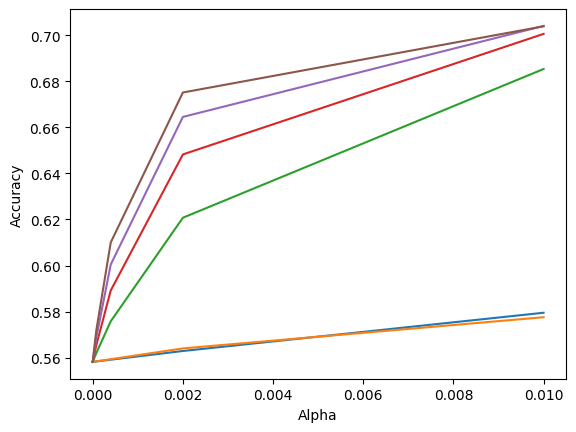

In [84]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def train():
    bestest_model = [0, None, "None"]
    for modelStruct in modelList:
        xPoint = []
        yPoint = []
        name, modelCall = modelStruct
        print(f"{name}{"-" * 100}")
        lowestVal = [1000, 0, None, 0, 0, 0]
        for alpha in alphaList:
            model = modelCall(alpha)
            model.fit(X_train, y_train)
    
            #get MSEs
            train_pred = model.predict(X_train)
            train_mse  = mean_squared_error(y_train, train_pred)
            val_pred   = model.predict(X_val)
            val_mse    = mean_squared_error(y_val, val_pred)
            error      = abs(train_mse - val_mse)
            acc        = model.score(X_val, y_val)
            #I PONDERED IF ACCURACY IS PAC OR MODE.SCORE(), IN THE END I USED MODEL.SCORE()
    
            print(f"  alpha {alpha}\n   train:    {train_mse}\t   val:      {val_mse}\n   error:    {error}\t   accuracy: {acc}")
            if (lowestVal[5] < acc):
                lowestVal = [error, alpha, model, train_mse, val_mse, acc]
                if (bestest_model[0] < acc):
                    bestest_model = [acc, model, name]
            xPoint.append(alpha)
            yPoint.append(acc)
        plt.plot(xPoint, yPoint)
        best_model = lowestVal[2]
        #print requirements
        print(f"\nBest alpha: {lowestVal[1]}\nGeneralization error: {lowestVal[0]}\nCoefficient: {best_model.coef_}\nIntercept: {best_model.intercept_}\nTrain MSE: {lowestVal[3]}\nVal MSE: {lowestVal[4]}\nAccuracy: {lowestVal[5]}\n\n")
    print(f"Best model: {bestest_model[2]}")
    best_model = bestest_model[1]
    print(f"\nBest alpha: {lowestVal[1]}\nGeneralization error: {lowestVal[0]}\nCoefficient: {best_model.coef_}\nIntercept: {best_model.intercept_}\nTrain MSE: {lowestVal[3]}\nVal MSE: {lowestVal[4]}\nAccuracy: {lowestVal[5]}\n\n")
    plt.xlabel("Alpha")
    plt.ylabel("Accuracy")
    plt.show()
    return best_model
best_model = train()

    predictedPrice    price
0     10835.428874   9989.0
1     12459.323806  11694.0
2      6843.973308   5399.0
3      8130.295318   7775.0
4     17385.713470  18620.0
5     15049.818591  16430.0
6     26258.533516  28248.0
7      6872.669526   7099.0
8     19883.933333  14399.0
9     10268.054221   9279.0
10    20488.177265  23875.0
11     9753.782899   9549.0
12    19531.254364  15690.0
13     7876.254014   8058.0
14    10414.721284   8449.0
15     9638.484152   8189.0
16    11148.692941  10245.0
17    16226.754980  16900.0
18     7878.596240   6938.0
19     9786.923837   8495.0
20     7148.182506   8238.0
21     9747.565914   9298.0
22    23713.267649  28176.0
23    27151.644874  31600.0
24     9941.187058  11248.0
25    19758.089462  22625.0
26     8589.049704   7609.0
27     9882.481772  10295.0
28     7819.418577   6695.0
29     7322.055121   7603.0
30    12127.073986  11549.0
31    14358.601091  15510.0
    predictedPeak-rpm  peak-rpm
0         4745.658696    4800.0
1         47

<Axes: xlabel='horsepower', ylabel='predictedHorsepower'>

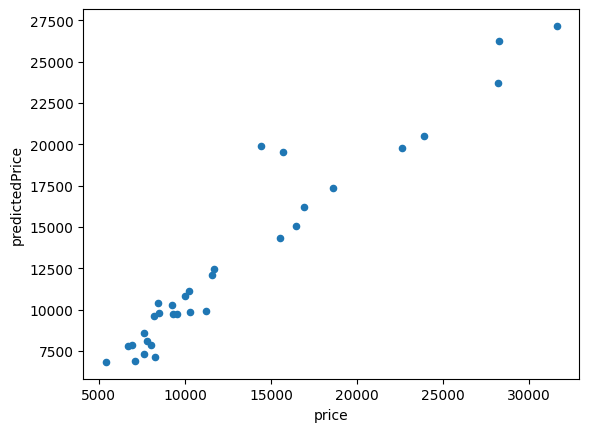

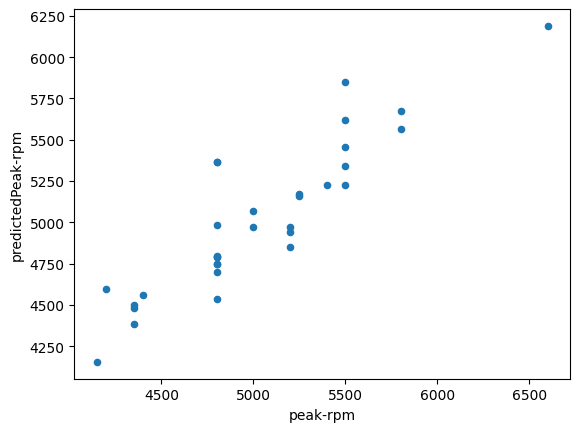

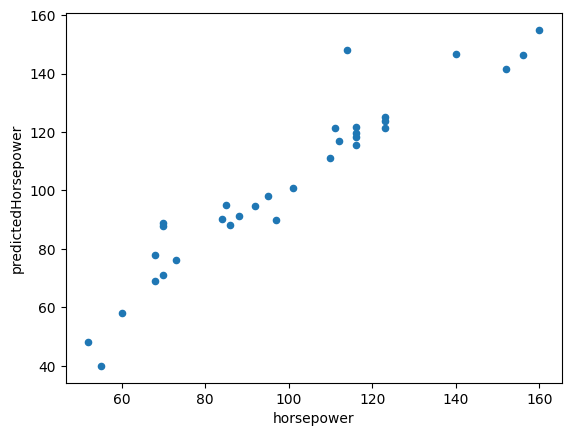

In [85]:
y_pred = best_model.predict(X_test)

y_pred = pd.DataFrame(y_pred, columns=["predictedPrice", "predictedPeak-rpm", "predictedHorsepower"])

print(pd.concat([y_pred[["predictedPrice"]], y_test[["price"]].reset_index(drop=True)], axis=1))
print(pd.concat([y_pred[["predictedPeak-rpm"]], y_test[["peak-rpm"]].reset_index(drop=True)], axis=1))
print(pd.concat([y_pred[["predictedHorsepower"]], y_test[["horsepower"]].reset_index(drop=True)], axis=1))

pd.concat([y_pred[["predictedPrice"]], y_test[["price"]].reset_index(drop=True)], axis=1).plot(kind="scatter", x="price", y="predictedPrice")
pd.concat([y_pred[["predictedPeak-rpm"]], y_test[["peak-rpm"]].reset_index(drop=True)], axis=1).plot(kind="scatter", x="peak-rpm", y="predictedPeak-rpm")
pd.concat([y_pred[["predictedHorsepower"]], y_test[["horsepower"]].reset_index(drop=True)], axis=1).plot(kind="scatter", x="horsepower", y="predictedHorsepower")

#xPoint, yPoint = [], []
#for i in range(len(y_pred)):
#    xPoint.append(y_pred[i][0])
#    yPoint.append(np.array(y_test, dtype="int")[i][0])
#plt.plot(xPoint, yPoint)

In [86]:
numList = [[newColumns[i], abs(best_model.coef_[2][i])] for i in range(len(best_model.coef_[2]))]
sortList = sorted(numList, key=lambda num: num[1], reverse=True) 
top8 = [sortList[i][0] for i in range(8)]
print(top8)

['symboling', 'body-style_wagon', 'engine-type_l', 'make_mitsubishi', 'make_plymouth', 'engine-type_ohcf', 'price', 'body-style_sedan']


Ridge-------------------------------------------------------------------------------------------------------------------
  alpha 0.01
   train:    72291.68760045628	   val:      44194.88400435052
   error:    28096.80359610576	   accuracy: 0.4788599695683316
  alpha 0.002
   train:    72291.66369160904	   val:      44191.872660125686
   error:    28099.79103148335	   accuracy: 0.47887900254179394
  alpha 0.0004
   train:    72291.66273163617	   val:      44191.2698799354
   error:    28100.392851700773	   accuracy: 0.4788828088112254
  alpha 8e-05
   train:    72291.66269320819	   val:      44191.1493034035
   error:    28100.513389804684	   accuracy: 0.4788835700516068
  alpha 1.6e-05
   train:    72291.66269167086	   val:      44191.12518727709
   error:    28100.537504393775	   accuracy: 0.4788837222991386
  alpha 3.2e-06
   train:    72291.66269160937	   val:      44191.12036401897
   error:    28100.542327590396	   accuracy: 0.4788837527486236
  alpha 6.4e-07
   train:    72291.66

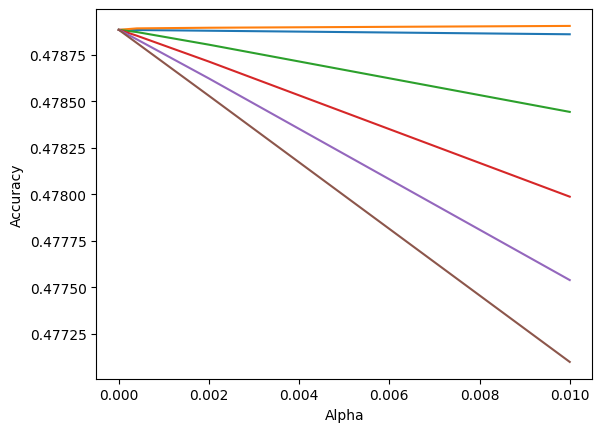

Lasso(alpha=0.01, max_iter=50000)

In [87]:
X = dataCleaned[top8]
y = dataCleaned[target]

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.4, random_state=None)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=None)

train()